In [71]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import random

In [72]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [84]:
N, W, H, C = x_train.shape
epoch = 100
batch_size = 16
Classes = {0: 'airplane',
            1: 'automobile',
            2: 'bird',
            3: 'cat',
            4: 'deer',
            5: 'dog',
            6: 'frog',
            7: 'horse',
            8: 'ship',
            9: 'truck'}

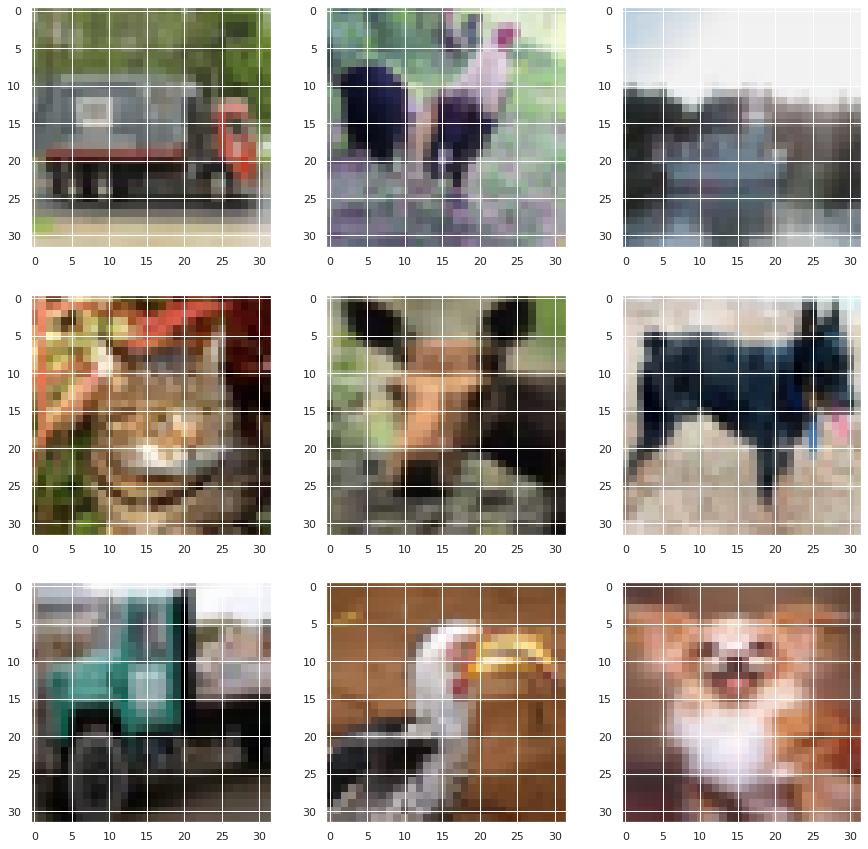

In [75]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    index = random.randint(0, N)
    axs.flat[i].imshow(x_train[index])

In [76]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [77]:
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test / 255

In [78]:
y_train = to_categorical(y_train, num_classes=10, dtype='float32')
y_test = to_categorical(y_test, num_classes=10, dtype='float32')

In [79]:
input_shape=x_train.shape[1:]
def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(32, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, 3, activation='relu', padding='same'))
    model.add(Conv2D(64, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D())

    model.add(Conv2D(128, 3, activation='relu', padding='same'))
    model.add(Conv2D(128, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    print(model.summary())

    opt = SGD()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


    return model

In [80]:
model = build_model(x_train.shape[1:])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 8, 8, 128)       

In [83]:
hist = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test), batch_size=16, verbose=2)

In [85]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

<AxesSubplot:>

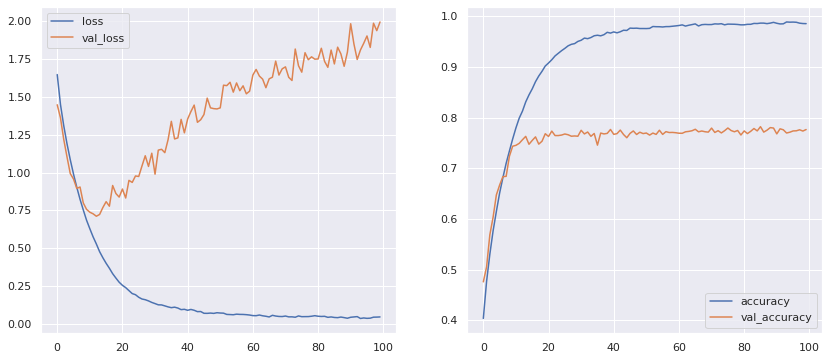

In [86]:
import seaborn as sns
sns.set_theme(style='darkgrid')

epochs = list(range(epoch))

fix, ax = plt.subplots(1, 2, figsize=(14,6))
sns.lineplot(epochs, hist.history['loss'], label="loss", ax=ax[0])
sns.lineplot(epochs, hist.history['val_loss'], label='val_loss', ax=ax[0])
sns.lineplot(epochs, hist.history['accuracy'], label='accuracy', ax=ax[1])
sns.lineplot(epochs, hist.history['val_accuracy'], label='val_accuracy', ax=ax[1])

In [87]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 1.9956 - accuracy: 0.7764
1.9956316947937012 0.7764000296592712


Text(0.5, 1.0, 'deer')

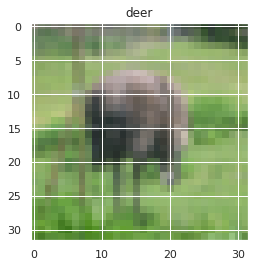

In [90]:
index = random.randint(0, x_test.shape[0])
pred = model.predict(x_test[index].reshape(1, W, H, C))
plt.imshow(x_test[index])
plt.title(Classes[pred.argmax()])